In [22]:
import numpy as np
from decision_tree import *
import matplotlib.pyplot as plt

In [23]:
# Reads data from the data files and split them into training and testing data 

def readData(x):
    M = np.genfromtxt('monks_data/monks-' + str(x) + '.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    M = np.genfromtxt('monks_data/monks-' + str(x) + '.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    
    return ytrn, Xtrn, ytst, Xtst 

In [24]:
# To plot graphs for Error vs Tree Depth

def plotGraph(train_loss, test_loss, x):
    plt.figure(figsize=(5,5))
    plt.plot([i for i in range(1,11)],train_loss, label="train loss")
    plt.plot([i for i in range(1,11)],test_loss, label="test loss")
    
    plt.title('Monk-' + str(x) + ' Data')
    plt.xlabel('Tree depth', fontsize=16)
    plt.ylabel('Error', fontsize=16)

    plt.xticks(list([1,2,3,4,5,6,7,8,9,10]), fontsize=12)
    plt.legend(['Train Error', 'Test Error'], fontsize=16,loc='upper right')  




# Section B 
    
      For each monk-data:
       -  Learing decision trees for dephts [1,2, ... 10]
       -  Printing the average training and testing error
       -  Plotting a graph for error vs tree depth


Average Training Error for monk-1 data:  8.709677419354836
Average Testing Error for monk-1 data:  13.33333333333333



Average Training Error for monk-2 data:  35.91715976331361
Average Testing Error for monk-2 data:  34.143518518518526



Average Training Error for monk-3 data:  7.704918032786886
Average Testing Error for monk-3 data:  8.935185185185187





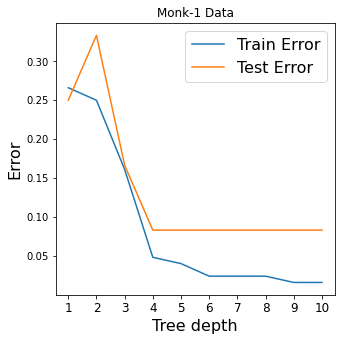

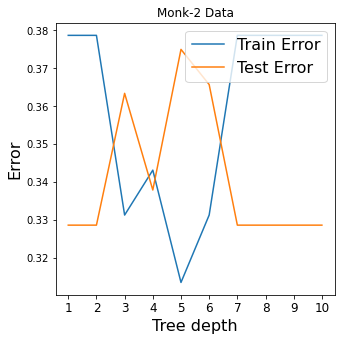

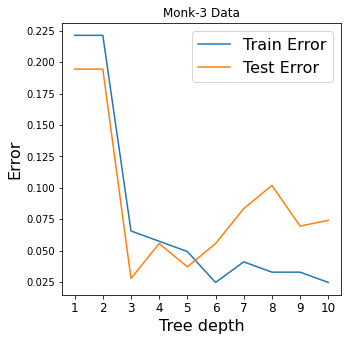

In [25]:
for x in range(1,4):
    ytrn, Xtrn, ytst, Xtst = readData(x)
    training_loss = []
    testing_loss = []
    
    for y in range(1,11):
        attribute_value_pairs = generateAttributeValuePairs(Xtrn)
        
        decision_tree = id3(Xtrn, ytrn, attribute_value_pairs, max_depth=y)
        
        y_pred_trn = [predict_example(i, decision_tree) for i in Xtrn]
        y_pred_tst = [predict_example(i, decision_tree) for i in Xtst]
                
        tst_err = compute_error(ytst, y_pred_tst)
        trn_err = compute_error(ytrn, y_pred_trn)
        
        training_loss.append(trn_err)
        testing_loss.append(tst_err)
        
    plotGraph(training_loss, testing_loss, x)
    print("Average Training Error for monk-" + str(x) + " data: ", (sum(training_loss)/len(training_loss))*100)
    print("Average Testing Error for monk-" + str(x) + " data: ", (sum(testing_loss)/len(testing_loss))*100)
    
    print("\n\n")

#  Section C

    For monks-1 Dataset
       - Learning decision tress using our algorithm for dephts [1,3,5]
       - Visualising the dree in the form of a .dot file
       - Generating a confusion matrix using scikit learn




In [26]:
import graphviz
from subprocess import call
import cv2
from sklearn.metrics import confusion_matrix

Confusion matrix for depth 1
[[216   0]
 [108 108]]


Confusion matrix for depth 3
[[216   0]
 [ 72 144]]


Confusion matrix for depth 5
[[192  24]
 [ 12 204]]




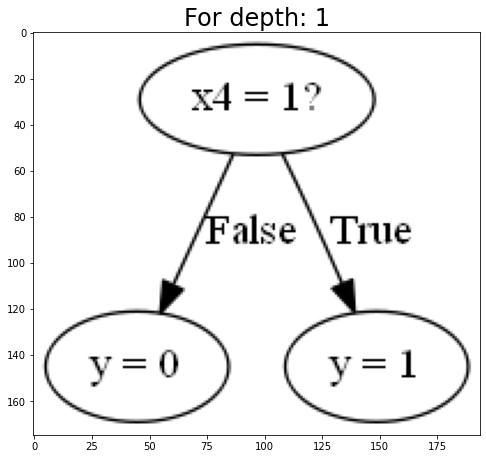

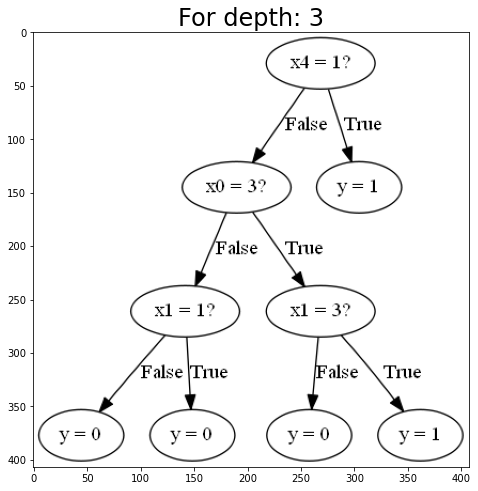

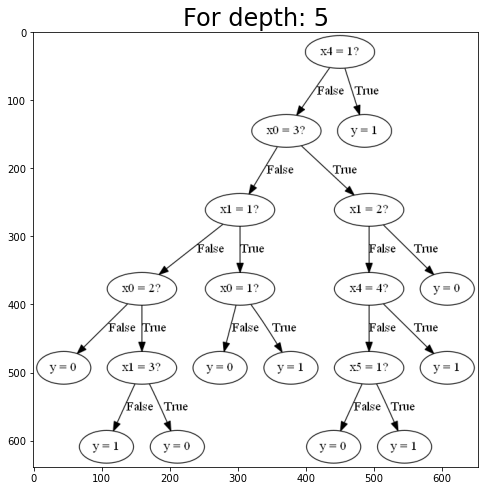

In [27]:
ytrn, Xtrn, ytst, Xtst = readData(1)

depths = [1,3,5]

for i in depths:
    attr_val_pairs = generateAttributeValuePairs(Xtrn)
    tree = id3(Xtrn, ytrn, attr_val_pairs, max_depth=i)
    y_dt=np.array([predict_example(x,tree) for x in Xtst])
    print('Confusion matrix for depth {}'.format(i))
    print(confusion_matrix(ytst, y_dt))
    print("\n")
    render_dot_file(to_graphviz(tree), './my_learned_tree_depth{}'.format(i))
    call(['dot', '-T', 'png', 'my_learned_tree_depth' + str(i) + '.dot', '-o', 'my_learned_tree_depth' + str(i) + '.png'])
    img = cv2.imread('my_learned_tree_depth' + str(i) + '.png')
    plt.figure(figsize = (8, 8))
    plt.title("For depth: "+ str(i), fontsize="24")
    plt.imshow(img)




#  Section D
    
    For monks-1 Dataset
       - Learning decision tress scikit learn's DecisionTreeClassifier for dephts [1,3,5]
       - Visualising the dree in the form of a .dot file
       - Generating a confusion matrix using scikit learn 




In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Confusion matrix for depth 1
[[216   0]
 [108 108]]


Confusion matrix for depth 3
[[144  72]
 [  0 216]]


Confusion matrix for depth 5
[[168  48]
 [ 24 192]]




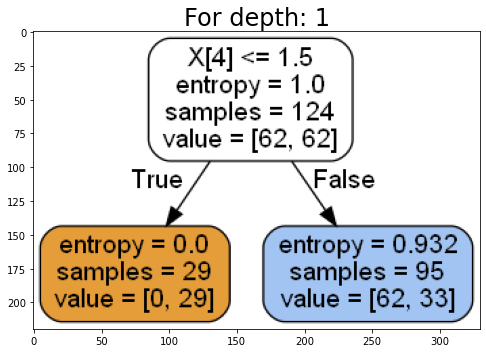

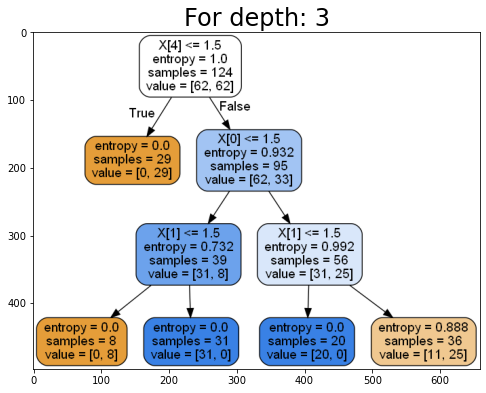

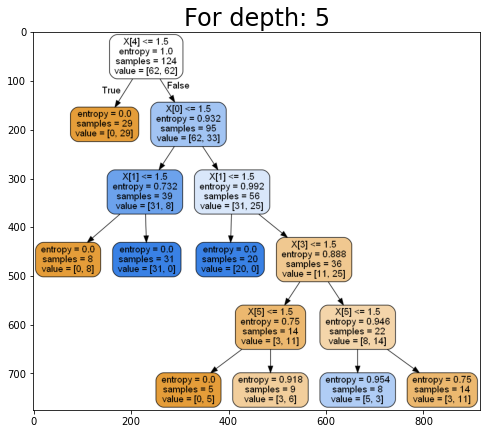

In [29]:
ytrn, Xtrn, ytst, Xtst = readData(1)
attr_val_pairs = generateAttributeValuePairs(Xtrn)

depths = [1,3,5]

for i in depths:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree = decision_tree.fit(Xtrn, ytrn)
    
    predictions = decision_tree.predict(Xtst)
    err = compute_error(ytst, predictions)
    
    print('Confusion matrix for depth {}'.format(i))
    print(confusion_matrix(ytst, predictions))
    print("\n")
    export_graphviz(decision_tree,out_file ="myTreeName_" + str(i) + ".dot",filled=True,rounded=True)
    call(['dot', '-T', 'png', 'myTreeName_' + str(i) + '.dot', '-o', 'myTreeName_' + str(i) + '.png'])
    img = cv2.imread('myTreeName_' + str(i) + '.png')
    plt.figure(figsize = (8, 8))
    plt.title("For depth: "+ str(i), fontsize="24")
    plt.imshow(img)